In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle, Rectangle, Arc
from sklearn import mixture
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer
%matplotlib inline

In [13]:
# Read the "training_data.csv" file
df = pd.read_csv("training_data.csv")
df.head()

,review_id,business_id,user_id,text,date,stars
0,3223,2055,2533,"Sometimes things happen, and when they do this...",2010-12-30,5
1,9938,4165,6371,I know Kerrie through my networking and we ben...,2011-04-26,5
2,7123,869,4929,Love their pizza!!!\nVery fresh. Their cannoli...,2012-09-28,5
3,3601,1603,2789,Being from NJ I am always on the prowl for my ...,2009-06-07,4
4,3948,2347,1245,We have tried this spot a few times and each v...,2011-02-20,4


In [14]:
# Read the "test_data.csv" file
df_test = pd.read_csv("test_data.csv")
df_test.head()

,review_id,business_id,user_id,text,date
0,2713,668,2196,Ticoz is not a bad place. The menu is eclecti...,2009-01-04
1,4734,1014,3521,"Wow!\nBeing a Phoenix native, we have enjoyed ...",2010-10-05
2,5598,2939,3028,Jodi is fantastic! Extraordinary! After too ...,2011-04-29
3,9545,4077,6200,T&S Glass did a wonderful job replacing my car...,2007-10-02
4,1471,1126,1268,My experience was on a random Saturday afterno...,2010-08-16


In [88]:
per = df.groupby("stars")["review_id"].count()/len(df)
per = per.tolist()

([<matplotlib.patches.Wedge at 0x129d690>,
 [Text(1.06969,0.256464,''),
  Text(0.796008,0.759191,''),
  Text(0.0649978,1.09808,''),
  Text(-1.0978,0.0695267,''),
  Text(0.548752,-0.953347,'')],
 [Text(0.583465,0.13989,'7.5%'),
  Text(0.434186,0.414104,'9.3%'),
  Text(0.0354534,0.598952,'14.6%'),
  Text(-0.5988,0.0379237,'35.3%'),
  Text(0.299319,-0.520008,'33.4%')])

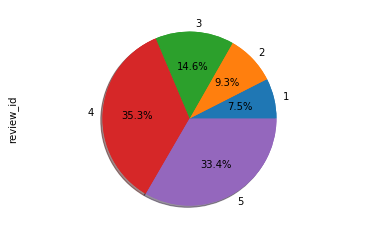

In [90]:
df.groupby("stars")["review_id"].count().plot.pie()
plt.axis("equal")
plt.pie(per, autopct='%1.1f%%', shadow=True)

In [16]:
text_train = df.text
text_test = df_test.text
y_train = df.stars

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

print('CountVectorizer defaults')
CountVectorizer()

CountVectorizer defaults


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [18]:
vectorizer = CountVectorizer()
vectorizer.fit(df.text)

X_train = vectorizer.transform(text_train)
X_test = vectorizer.transform(text_test)

In [19]:
print(len(vectorizer.vocabulary_))

26351


In [20]:
X_train.shape

(7997, 26351)

In [21]:
print(vectorizer.get_feature_names()[:6])

['00', '000', '007', '00am', '00pm', '01']


In [22]:
print(vectorizer.get_feature_names()[2000:2020])

['awhile', 'awkward', 'awkwardly', 'awkwardness', 'awlins', 'awning', 'awsome', 'aww', 'awwwwkwaaaard', 'axe', 'axis', 'ay', 'aybe', 'ayce', 'ayes', 'ayesha', 'az', 'az88', 'azcentral', 'azkaban']


In [23]:
print(X_train.shape)
print(X_test.shape)

(7997, 26351)
(2003, 26351)


# Logistic

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
prediction = clf.predict(X_test)

In [27]:
df_test.text.head()

0    Ticoz is not a bad place.  The menu is eclecti...
1    Wow!\nBeing a Phoenix native, we have enjoyed ...
2    Jodi is fantastic!  Extraordinary!  After too ...
3    T&S Glass did a wonderful job replacing my car...
4    My experience was on a random Saturday afterno...
Name: text, dtype: object

In [28]:
guess = {"col1":df_test["review_id"],"col2":prediction}
df_guess=pd.DataFrame(guess)
df_guess.to_csv("cp2_test6_20180523.csv",header=False,index=False)

## Random Forest

In [29]:
rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [30]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
prediction = rf.predict(X_test)

In [32]:
df_test.text.head()

0    Ticoz is not a bad place.  The menu is eclecti...
1    Wow!\nBeing a Phoenix native, we have enjoyed ...
2    Jodi is fantastic!  Extraordinary!  After too ...
3    T&S Glass did a wonderful job replacing my car...
4    My experience was on a random Saturday afterno...
Name: text, dtype: object

In [33]:
guess = {"col1":df_test["review_id"],"col2":prediction}
df_guess=pd.DataFrame(guess)
df_guess.to_csv("cp2_test7_20180523.csv",header=False,index=False)

# SVM

In [42]:
from sklearn.svm import SVR
clf_SVR = SVR(C=1.0, epsilon=0.2)
clf_SVR.fit(X_train, y_train) 
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
prediction = clf_SVR.predict(X_test)

In [44]:
guess = {"col1":df_test["review_id"],"col2":prediction}
df_guess=pd.DataFrame(guess)
df_guess.to_csv("cp2_test8_20180524.csv",header=False,index=False)

In [49]:
prediction.round()

array([4., 4., 4., ..., 4., 4., 4.])

In [50]:
guess = {"col1":df_test["review_id"],"col2":prediction.round()}
df_guess=pd.DataFrame(guess)
df_guess.to_csv("cp2_test9_20180604.csv",header=False,index=False)

# Vote the most probable prediction 

In [51]:
#匯入五種預測結果
predict6 = pd.read_csv("cp2_test6_20180523.csv", header = None) #Logistic Regression
predict7 = pd.read_csv("cp2_test7_20180523.csv",header = None) #Random Forest
predict9 = pd.read_csv("cp2_test9_20180604.csv", header = None) #SVM四捨五入


In [53]:
#建立dataframe存放四種方式之預測結果
vote = pd.concat([predict6, predict7, predict9], axis=1, ignore_index=True)
vote = vote.drop(columns = [2,4])
vote.columns = ["review_id", "predict6", "predict7", "predict9"]
vote.iloc[:,1:4].head()

,predict6,predict7,predict9
0,3,4,4.0
1,5,4,4.0
2,5,2,4.0
3,5,5,4.0
4,3,4,4.0


In [55]:
#找出每個row的眾數
most_freq = vote.iloc[:,1:5].mode(1)  #跑出來最多兩個眾數
most_freq.columns = ["first","second","third"]
#most_freq[pd.notnull(most_freq.second)]  #查看有兩個眾數的那幾筆資料
most_freq.head()

,first,second,third
0,4.0,NaN,NaN
1,4.0,NaN,NaN
2,2.0,4.0,5.0
3,5.0,NaN,NaN
4,4.0,NaN,NaN


## test10-以test6為基準

In [56]:
#以6為基準
single = vote.predict6.copy()
predict6origin = single.copy()

In [57]:
for i in range(len(vote)):
    if str(most_freq.iloc[i,1])=="nan":
        single[i]=most_freq.iloc[i,0]

In [60]:
(single==predict6origin).all()

False

In [59]:
guess1 = {"col1":vote["review_id"],"col2":single}
df_guess=pd.DataFrame(guess1)
df_guess.to_csv("cp2_test10_20180604.csv",header=False,index=False)

## test11-以test7為基準

In [65]:
#以7為基準
single = vote.predict7.copy()
predict7origin = single.copy()

In [66]:
for i in range(len(vote)):
    if str(most_freq.iloc[i,1])=="nan":
        single[i]=most_freq.iloc[i,0]

In [67]:
(single==predict7origin).all()

False

In [68]:
guess1 = {"col1":vote["review_id"],"col2":single}
df_guess=pd.DataFrame(guess1)
df_guess.to_csv("cp2_test11_20180604.csv",header=False,index=False)

## test12-以test9為基準

In [69]:
#以9為基準
single = vote.predict9.copy()
predict9origin = single.copy()

In [70]:
for i in range(len(vote)):
    if str(most_freq.iloc[i,1])=="nan":
        single[i]=most_freq.iloc[i,0]

In [71]:
(single==predict9origin).all()

False

In [72]:
guess1 = {"col1":vote["review_id"],"col2":single}
df_guess=pd.DataFrame(guess1)
df_guess.to_csv("cp2_test12_20180604.csv",header=False,index=False)